In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#读取实验数据,X增加一列1
def get_data(file):
    data = load_svmlight_file(file)
    b = np.ones(data[0].toarray().shape[0])
    X = np.column_stack((data[0].toarray(), b))
    return X, data[1]

In [3]:

class LinearClassifier(object):
    def __init__(self):
        self.W = None

class LinearSVM(LinearClassifier):
  def loss(self, X_batch, y_batch, reg):
    return svm_loss_vectorized(self.W, X_batch, y_batch, reg)

  def getloss(self, X, y, X_val, y_val, learning_rate=1e-3, reg=1e-5, num_iters=100):
      num_train, dim = X.shape
      # 计算类别总数，类别为(0,1...,k)
      num_classes = np.max(y) + 1
      if self.W is None:
          # 初始化W
          # np.random.randn(dim, num_classes)从标准正态分布中返回一个或多个样本值
          self.W = 0.001 * np.random.randn(dim, int(num_classes))

      loss_history_train = []
      loss_history_valid = []
      # 梯度下降去优化 W
      for it in range(num_iters):
          # 计算 loss and gradient
          loss_train, grad = self.loss(X, y, reg)
          loss_history_train.append(loss_train)

          loss_valid, grad2 = self.loss(X_val, y_val, reg)
          loss_history_valid.append(loss_valid)

          # 更新参数
          self.W += -learning_rate * grad
      return loss_history_train, loss_history_valid
#向量化计算梯度
def svm_loss_vectorized(W, X, y, reg):
  loss = 0.0
  # 初始化gradient为0
  dW = np.zeros(W.shape)
  XW = X.dot(W)
  num_train = X.shape[0]
  Sy = np.zeros(num_train)
#Sy[i]是正确的分类
  for i in range(num_train):
    Sy[i] = XW[i, y[i]]
#deltal设置1(如果一个正确分类的分值和举例它最近的错误分类的分值的差距是deltal)
  WX = XW.T - Sy + 1
#计算梯度和损失函数
  for i in range(num_train):
    WX[y[i],i] -= 1

  loss = np.sum( WX[WX > 0] )
  loss /= num_train

  XW = WX.T
  num_classes = W.shape[1]
  for i in range(num_train):
    for j in range(num_classes):
      if (XW[i, j] > 0):
        dW[:,j] += X[i,:].T
        dW[:,y[i]] -= X[i,:].T

  dW /= num_train
  dW += reg * W
  return loss, dW

In [4]:

def run_svm(file):
    # 读取实验数据,将类别处理成0,1
    X, y = get_data(file)
    temp = []
    for item in y:
        if item > 0:
            temp.append(1)
        else:
            temp.append(0)

    y = np.array(temp)
    #将数据集切分为训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
    #学习率和正则化参数
    learning_rates = 0.1
    regularization_strengths = 1

    #保存每次迭代时候的loss
    loss_train=[]
    loss_valid=[]
    #迭代次数
    iters = 30
    svm = LinearSVM()
    loss_train,loss_valid=svm.getloss(X_train, y_train, X_val,y_val,learning_rates, regularization_strengths, iters)
   # print(loss_train[-1])

    plt.plot(loss_valid, label='Lvalidation')
    plt.plot(loss_train,label='Ltrain')
    plt.legend()
    plt.show()
    plt.show()

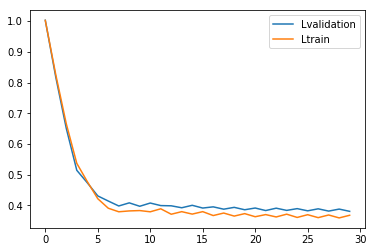

In [5]:
run_svm("C:\workspace\DeepLearningTest\data/australian_scale.txt")
    